In [9]:
import sys
sys.path.insert(0, '../scripts')

import pandas as pd
import numpy as np
import direction_transition as dit
from meals import find_meals, graph_group_stats, find_meals_paper
import paths
from preprocessing import read_csv_clean
import intervals as invs

pellet_count_threshold = 5
collect_quantile = 0.6
pellet_quantile = 0.6
time_threshold =130

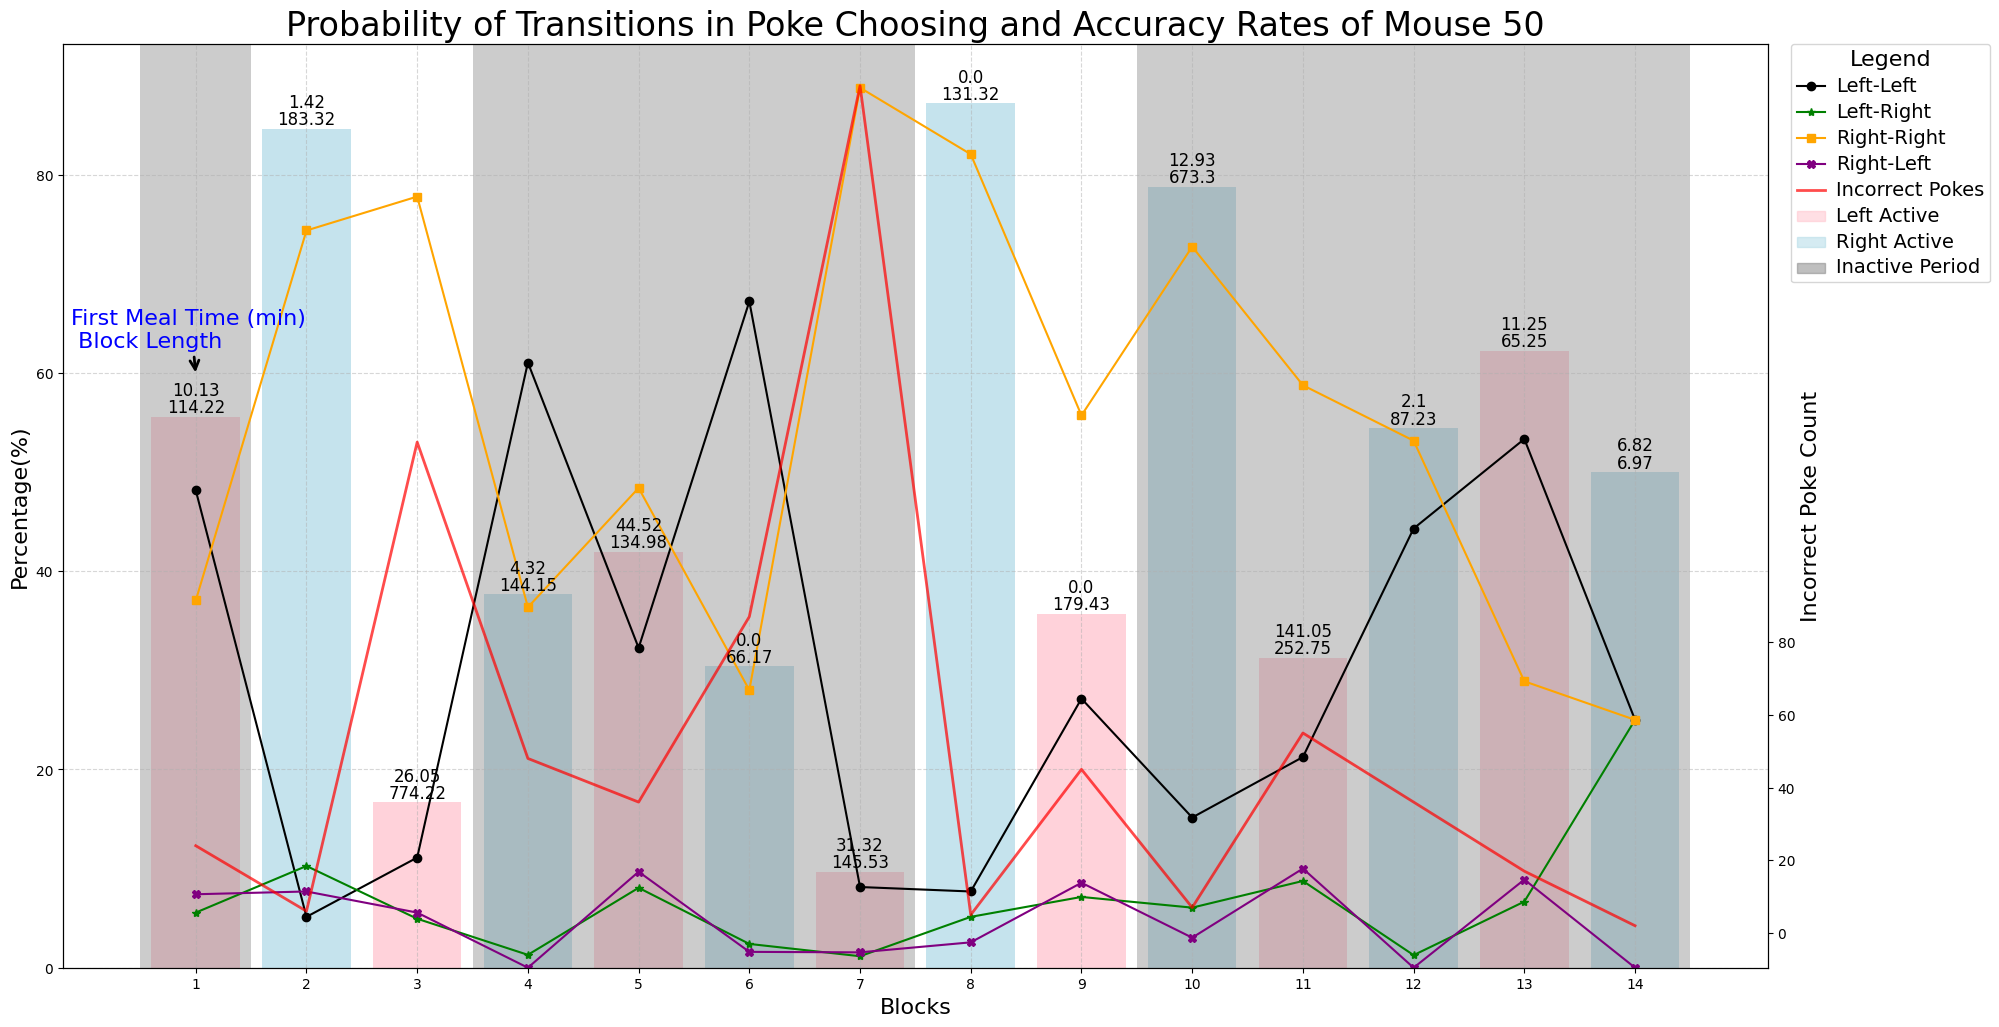

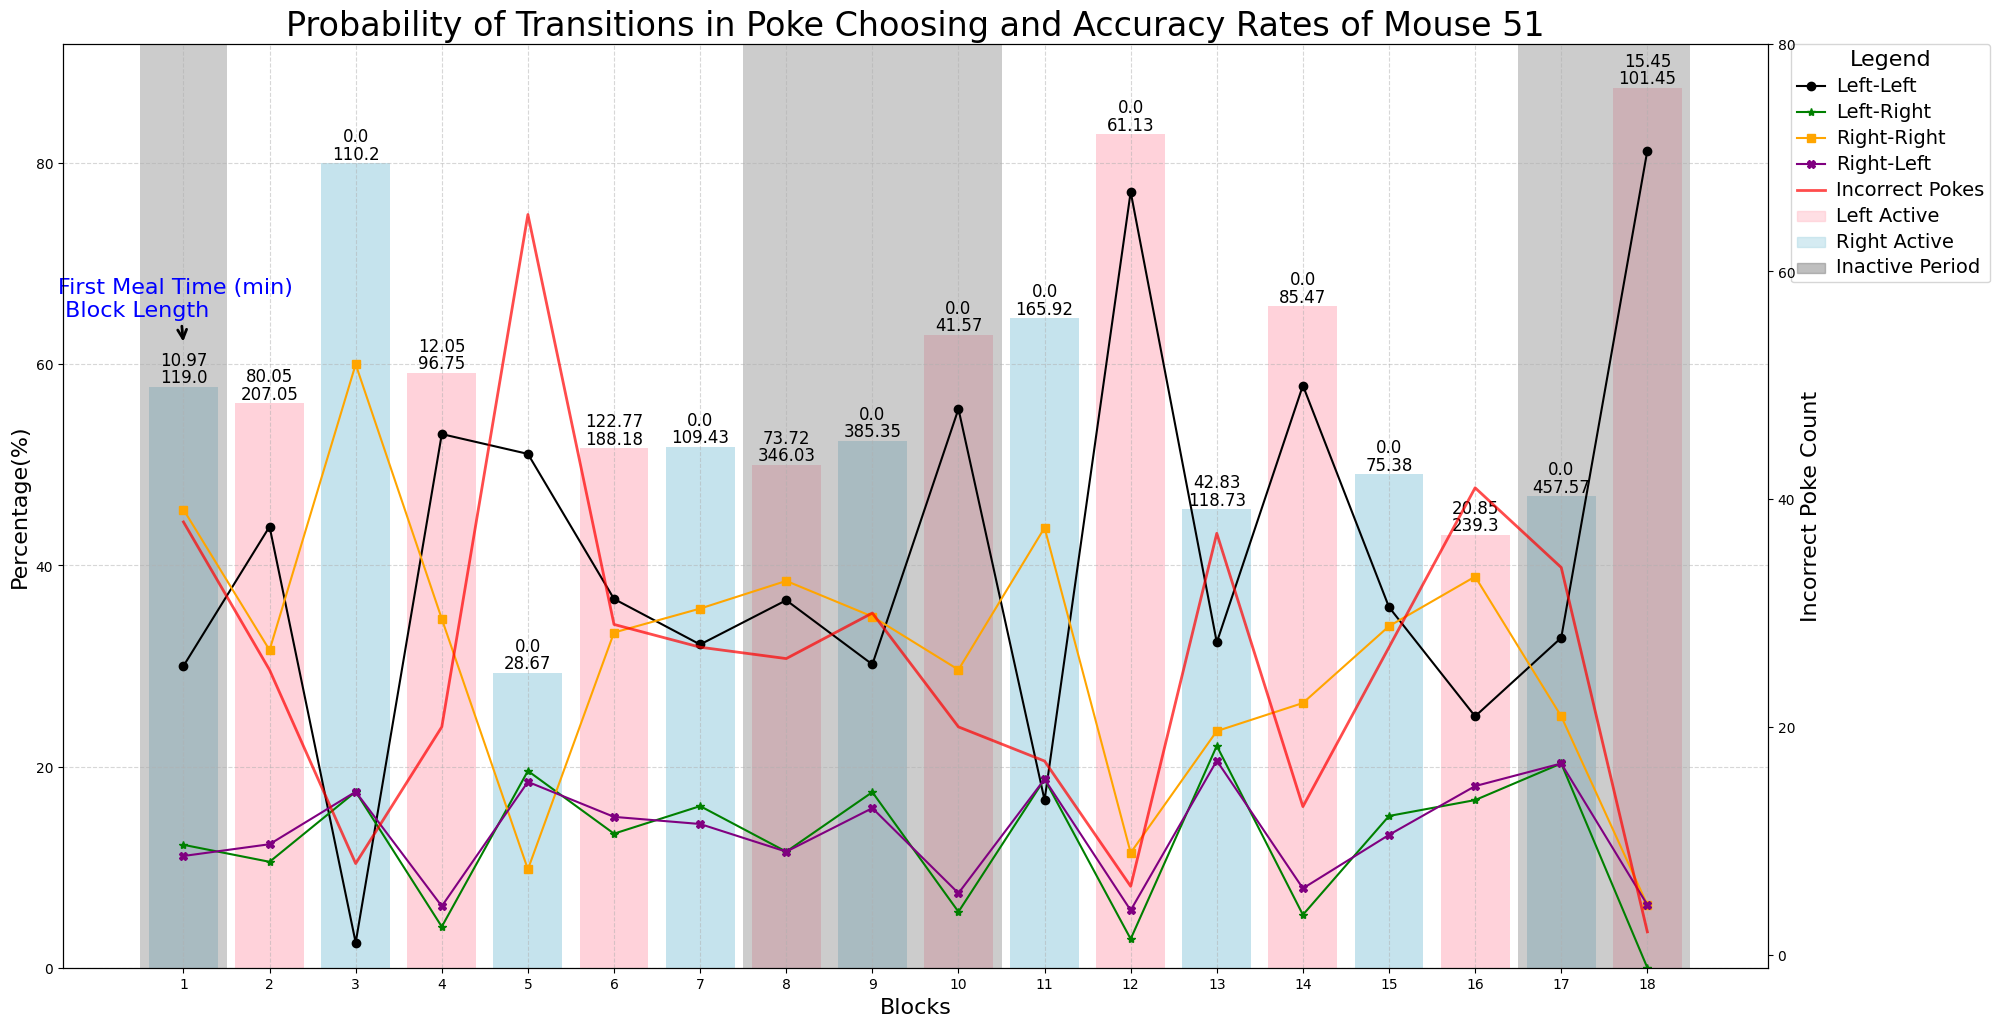

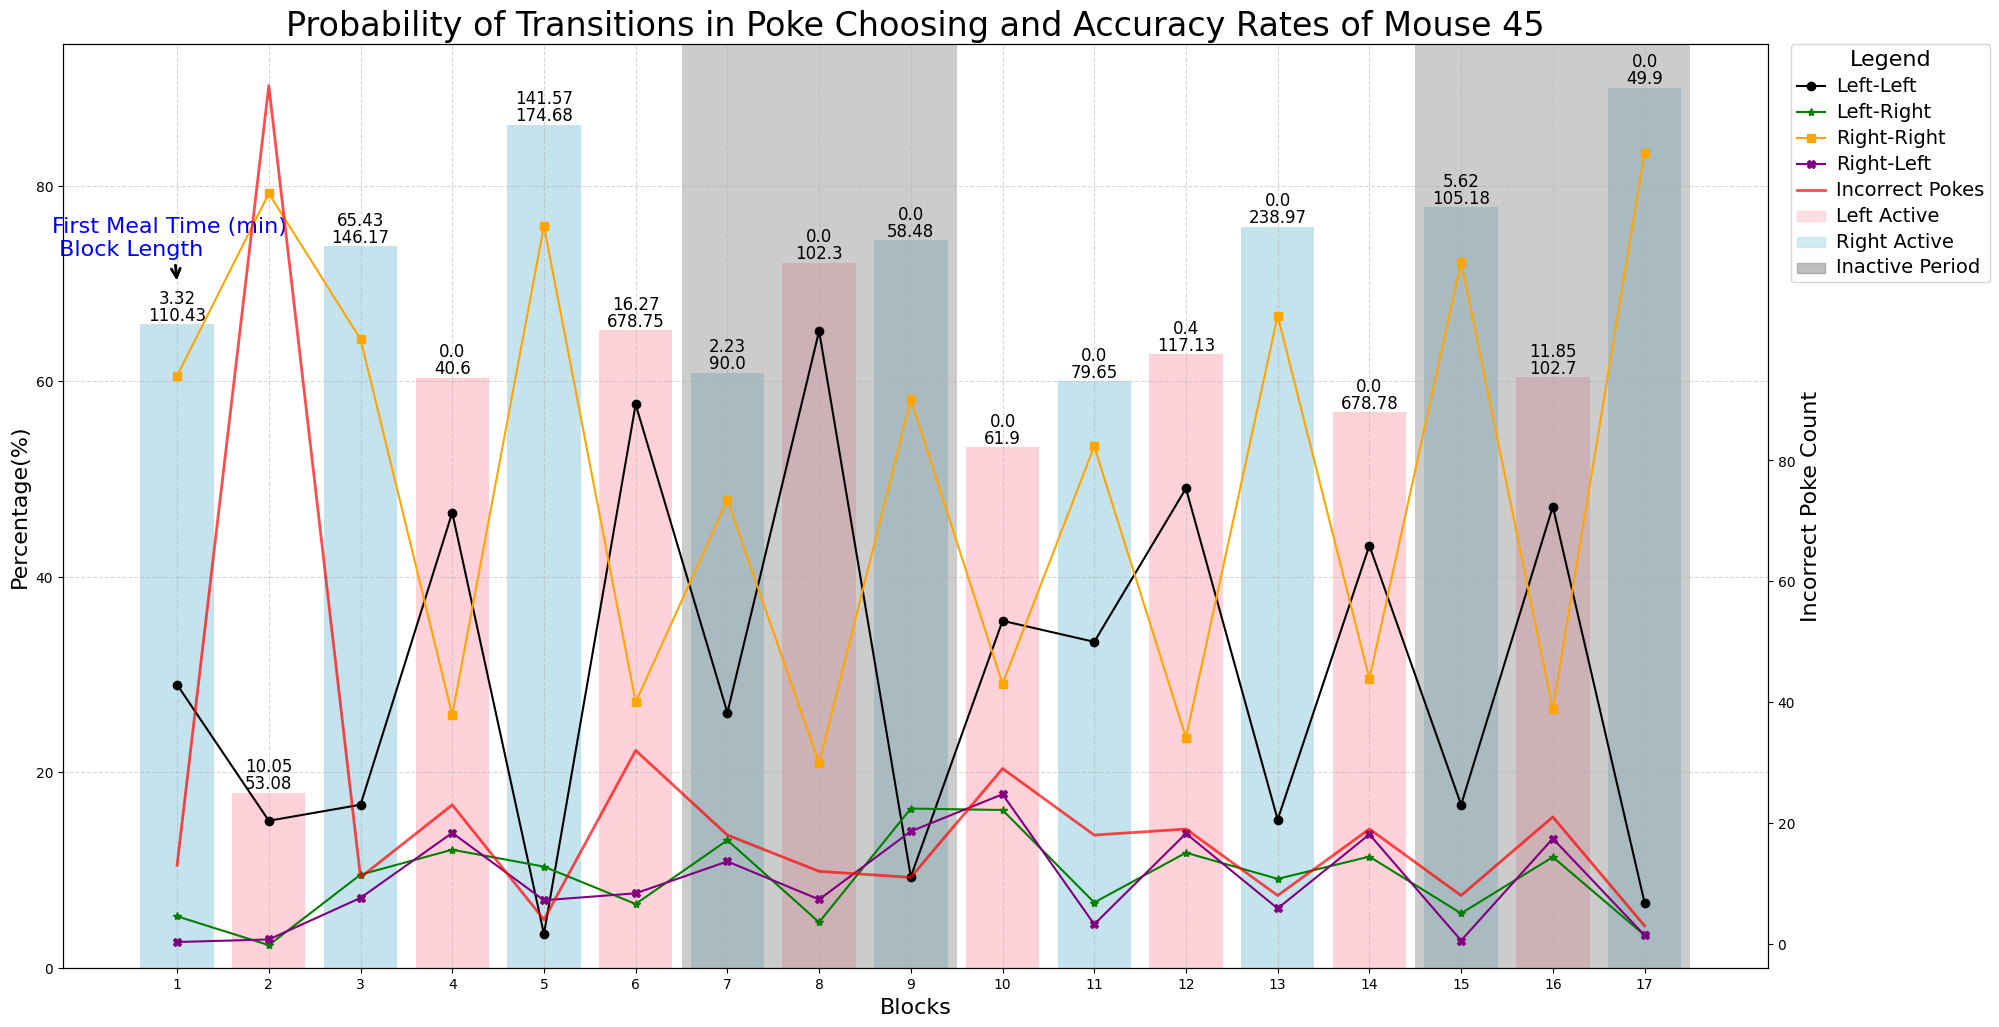

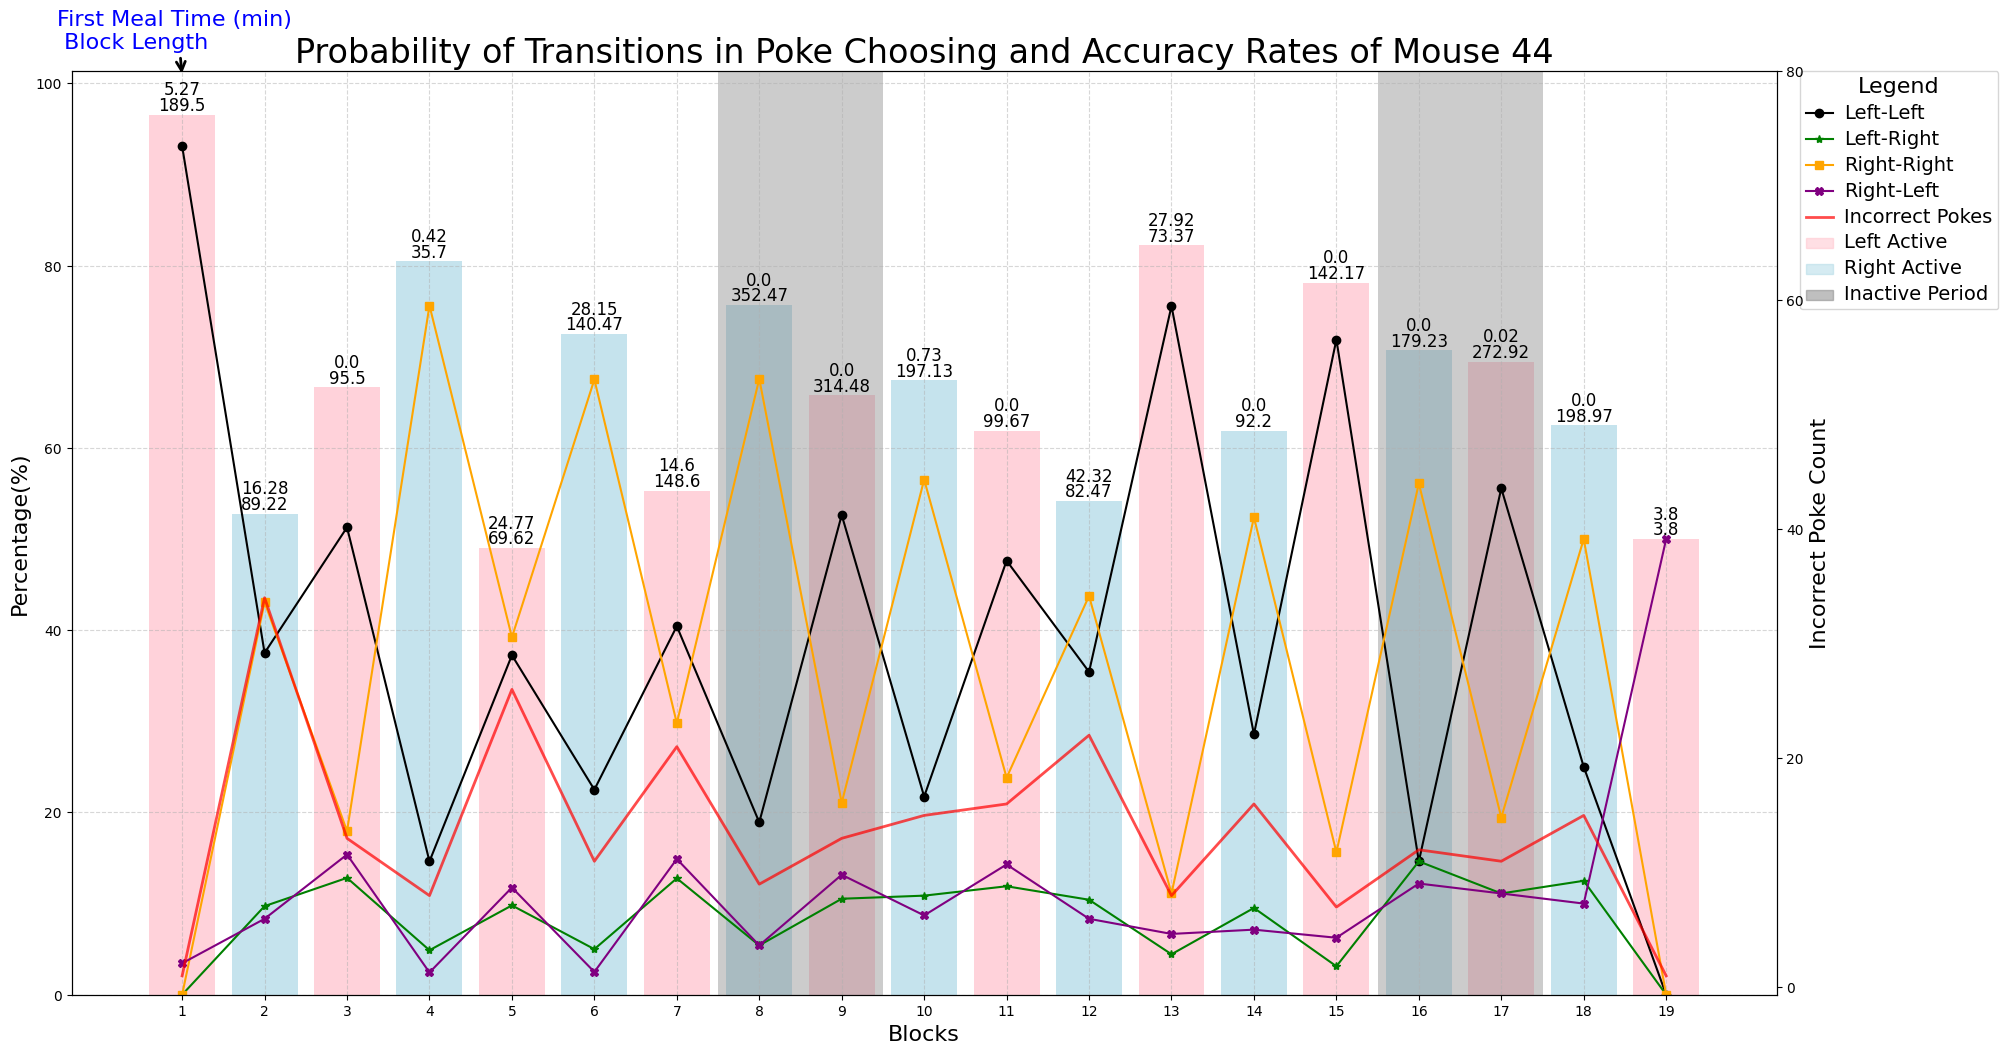

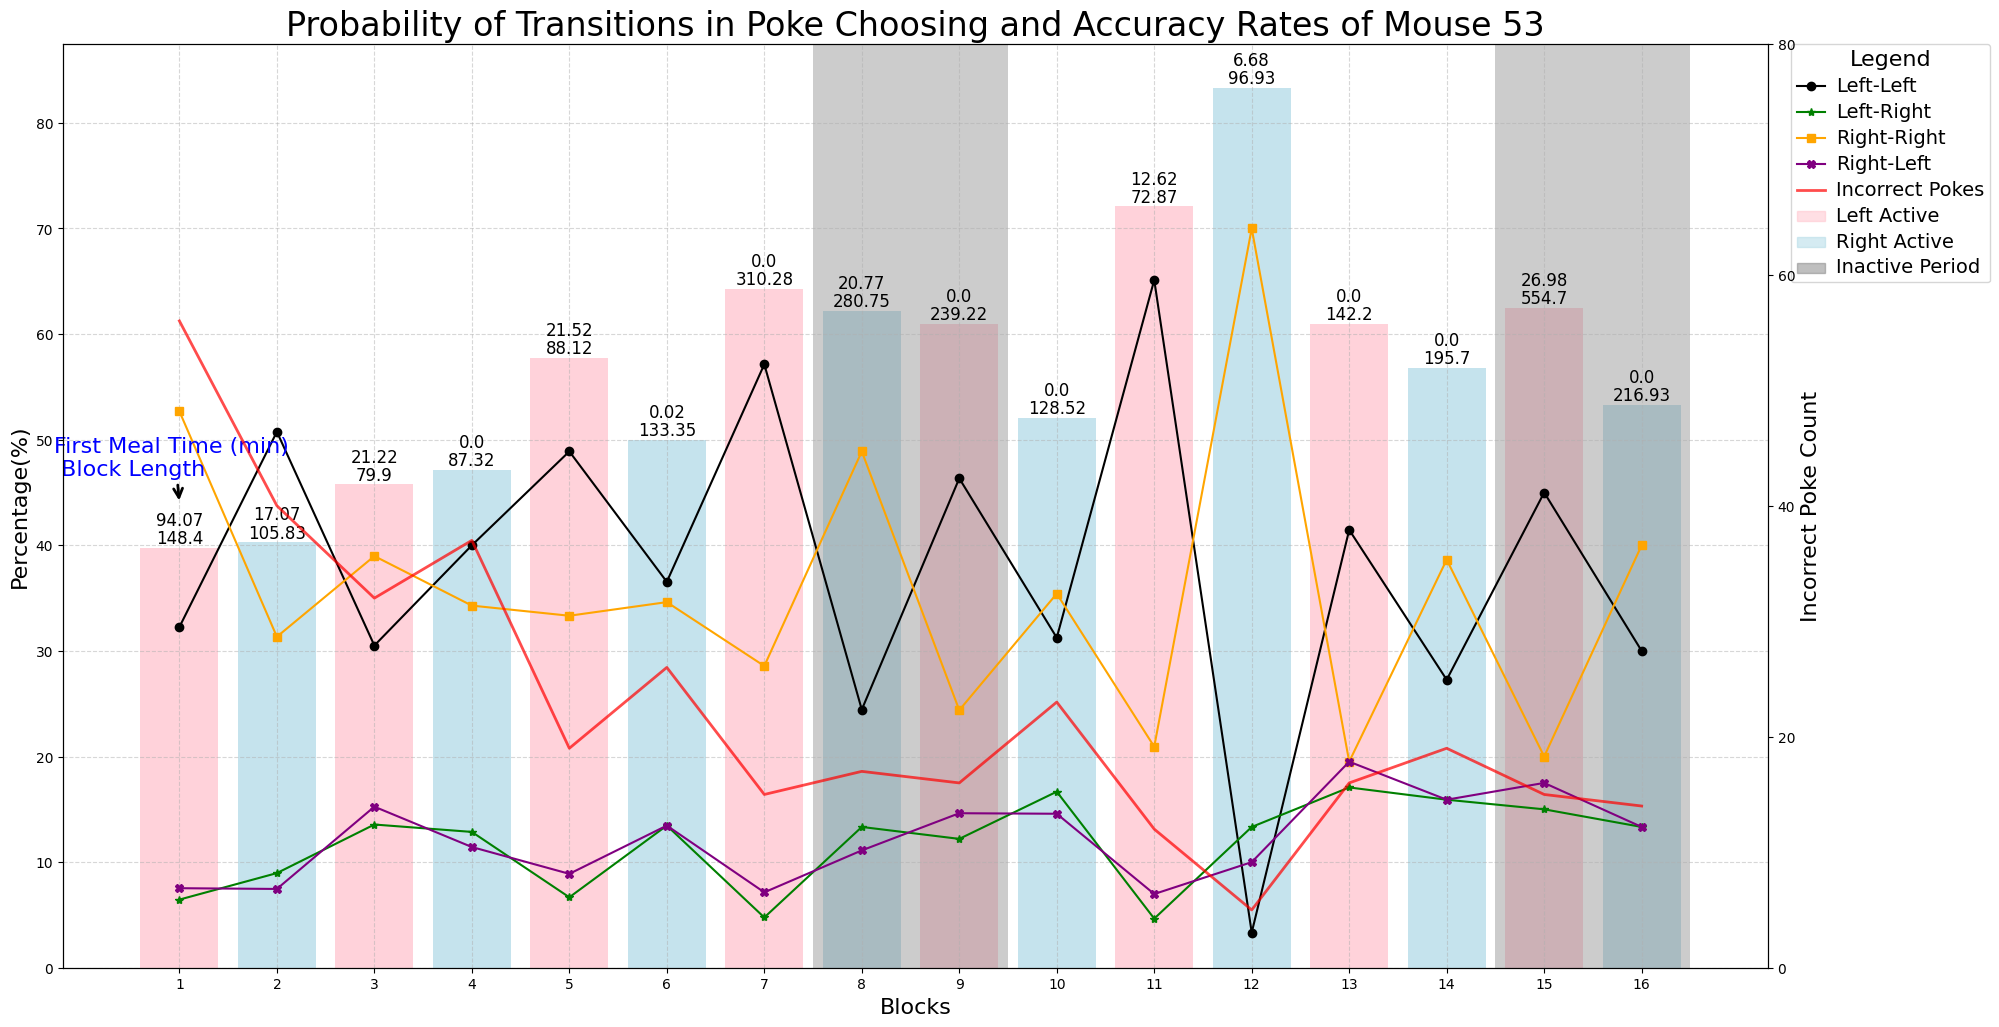

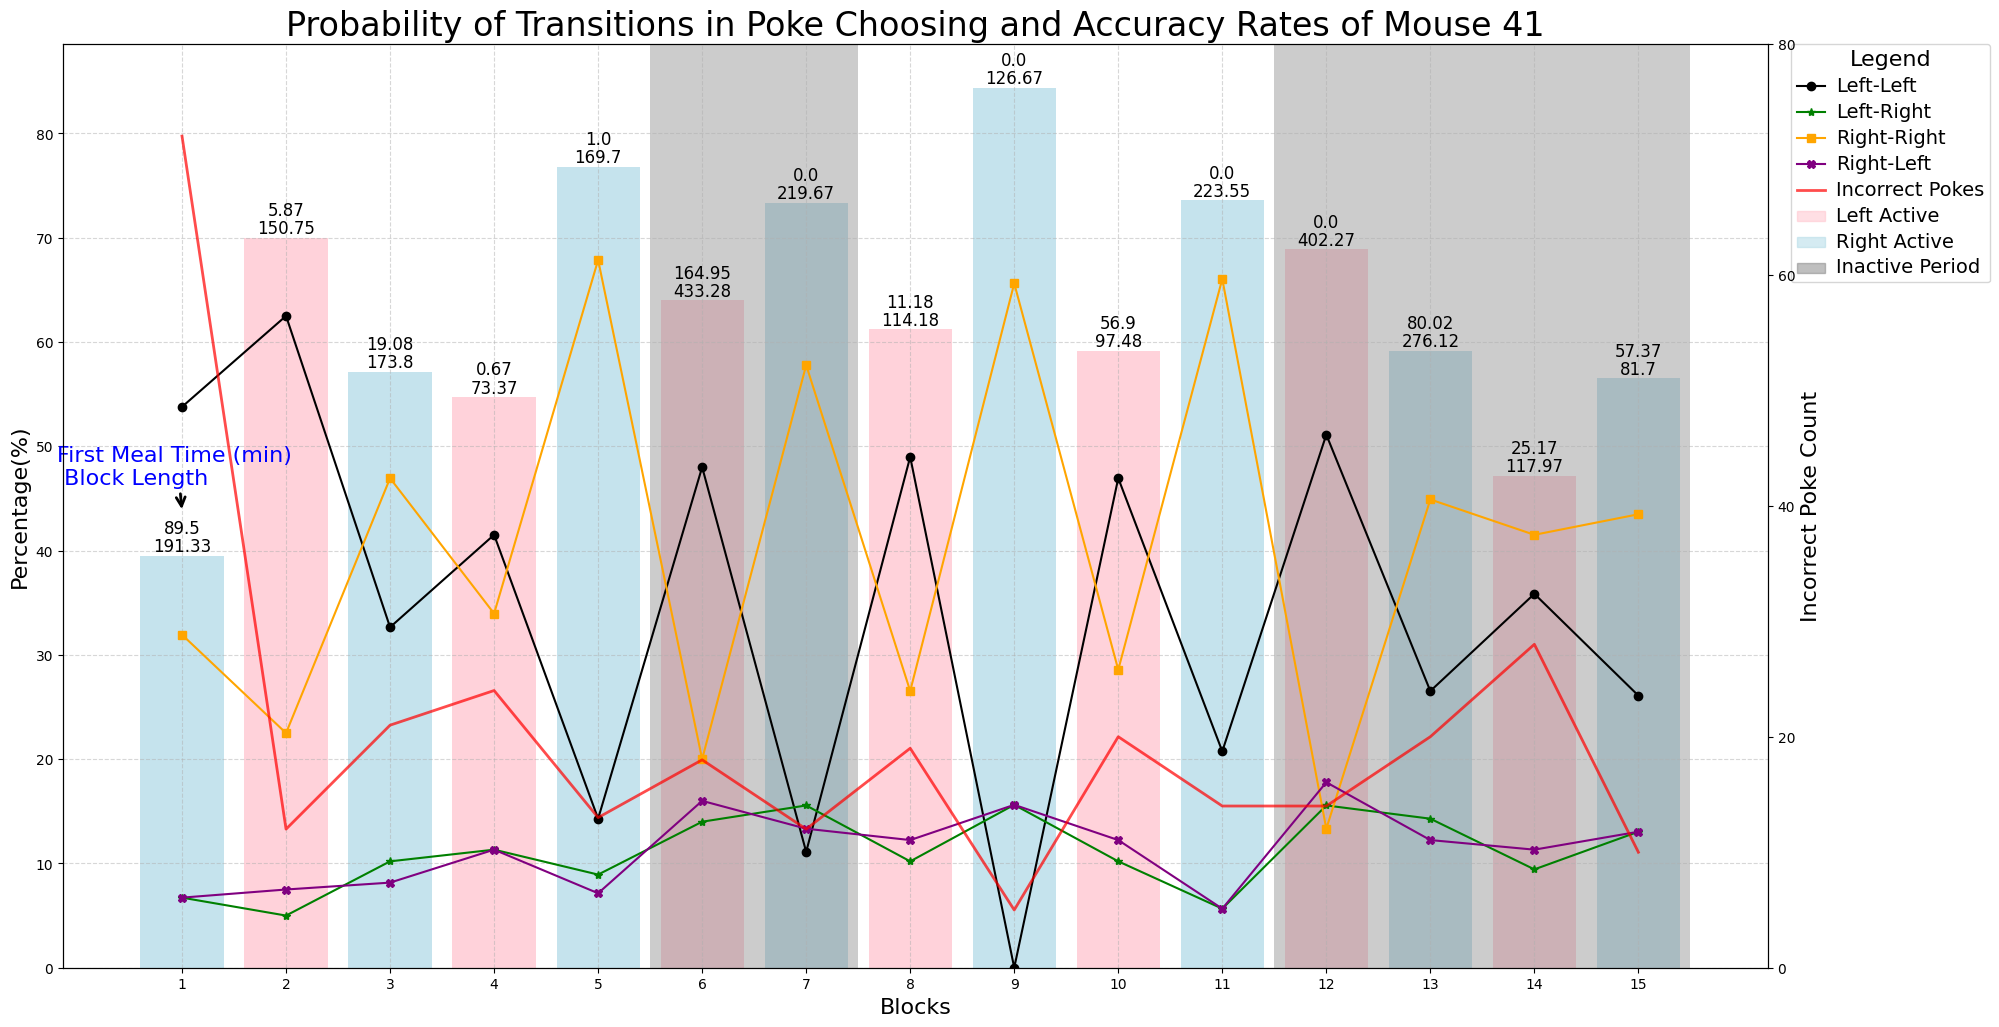

In [10]:
ctrl_block_fir_meal = []
ctrl_block_fir_meal_prop = []
for path in paths.reversal_ivsa_ctrl:
        data_dropped = read_csv_clean(path, remove_trivial=False, collect_time=True)
        blocks = dit.split_data_to_blocks(data_dropped)
        # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
        #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
        meal = find_meals_paper(data_dropped, time_threshold=time_threshold)
        data_stats = dit.get_transition_info(blocks, meal, reverse=True)
        
        avg_ratio, avg_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
        ctrl_block_fir_meal.append(avg_time)
        ctrl_block_fir_meal_prop.append(avg_ratio)
        dit.graph_tranition_stats(data_stats, blocks, path)
        # print(meal_threshold(data_dropped, collect_quantile, pellet_quantile))

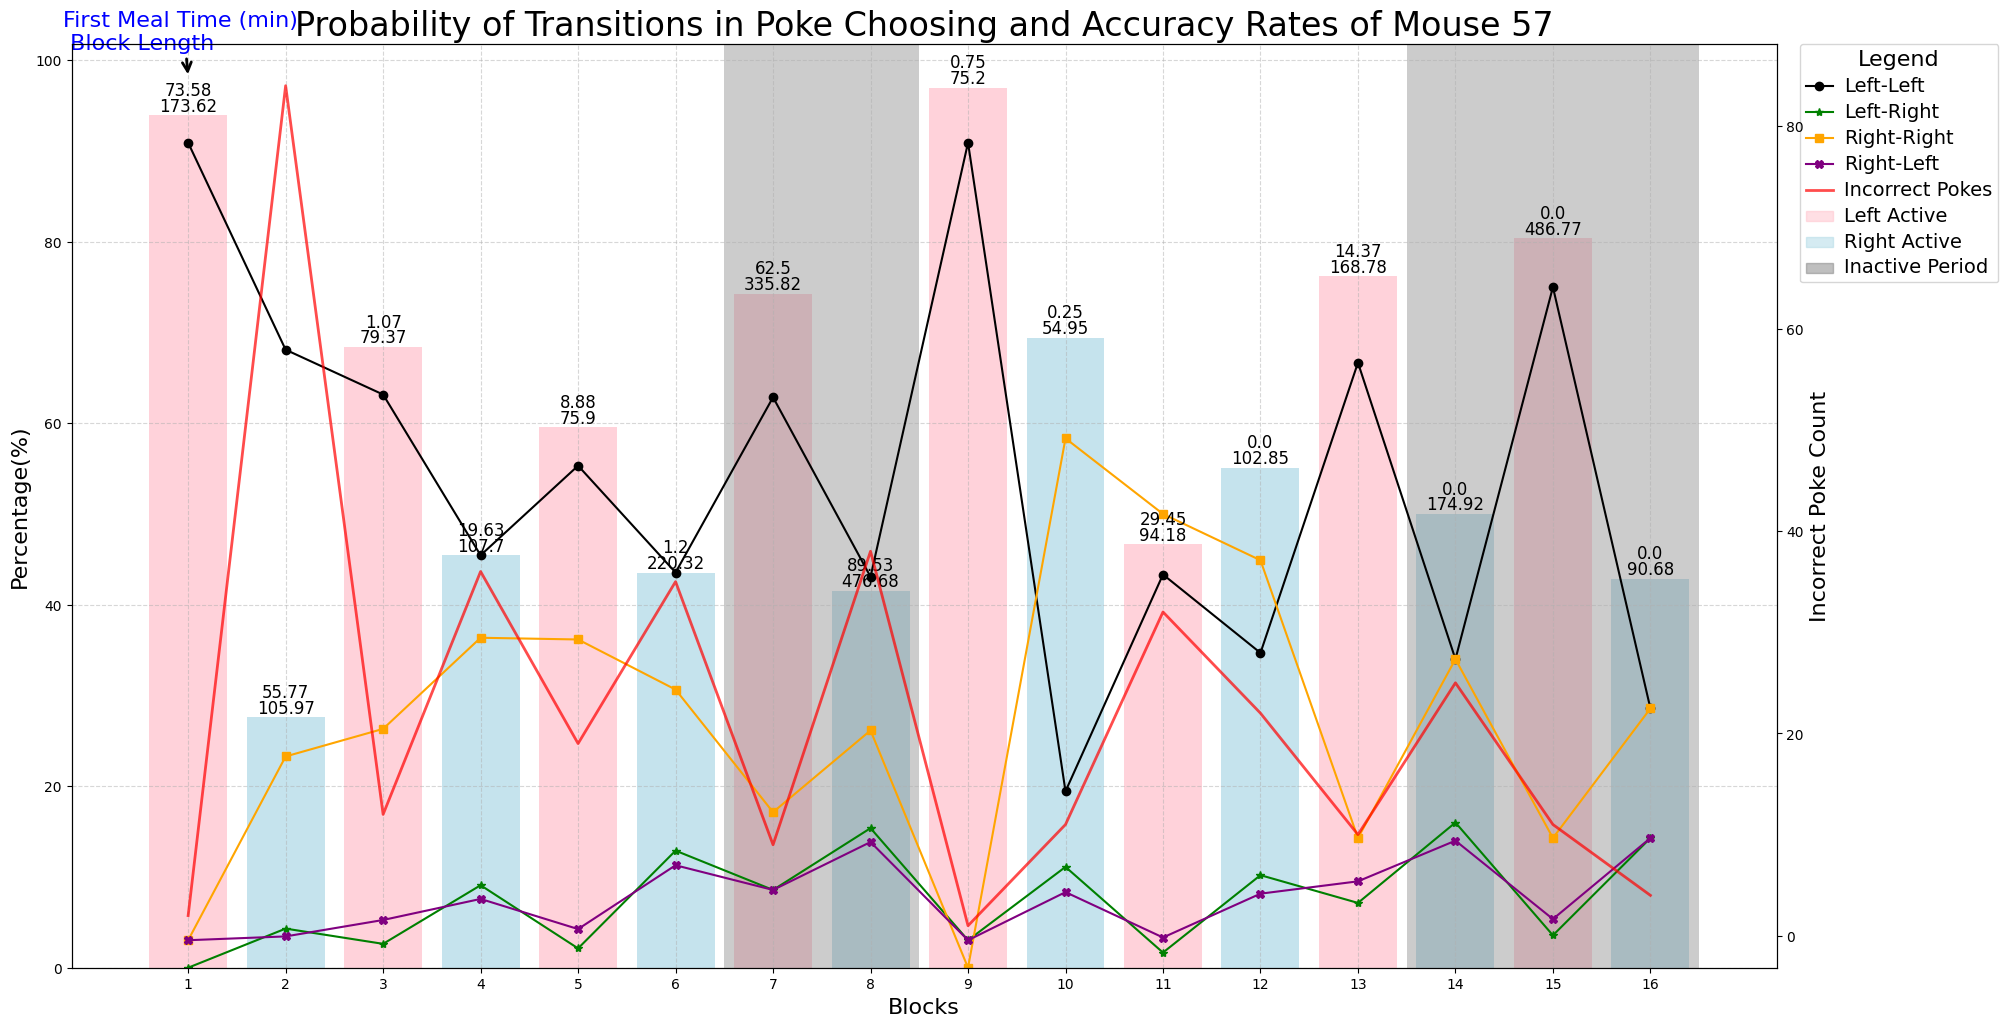

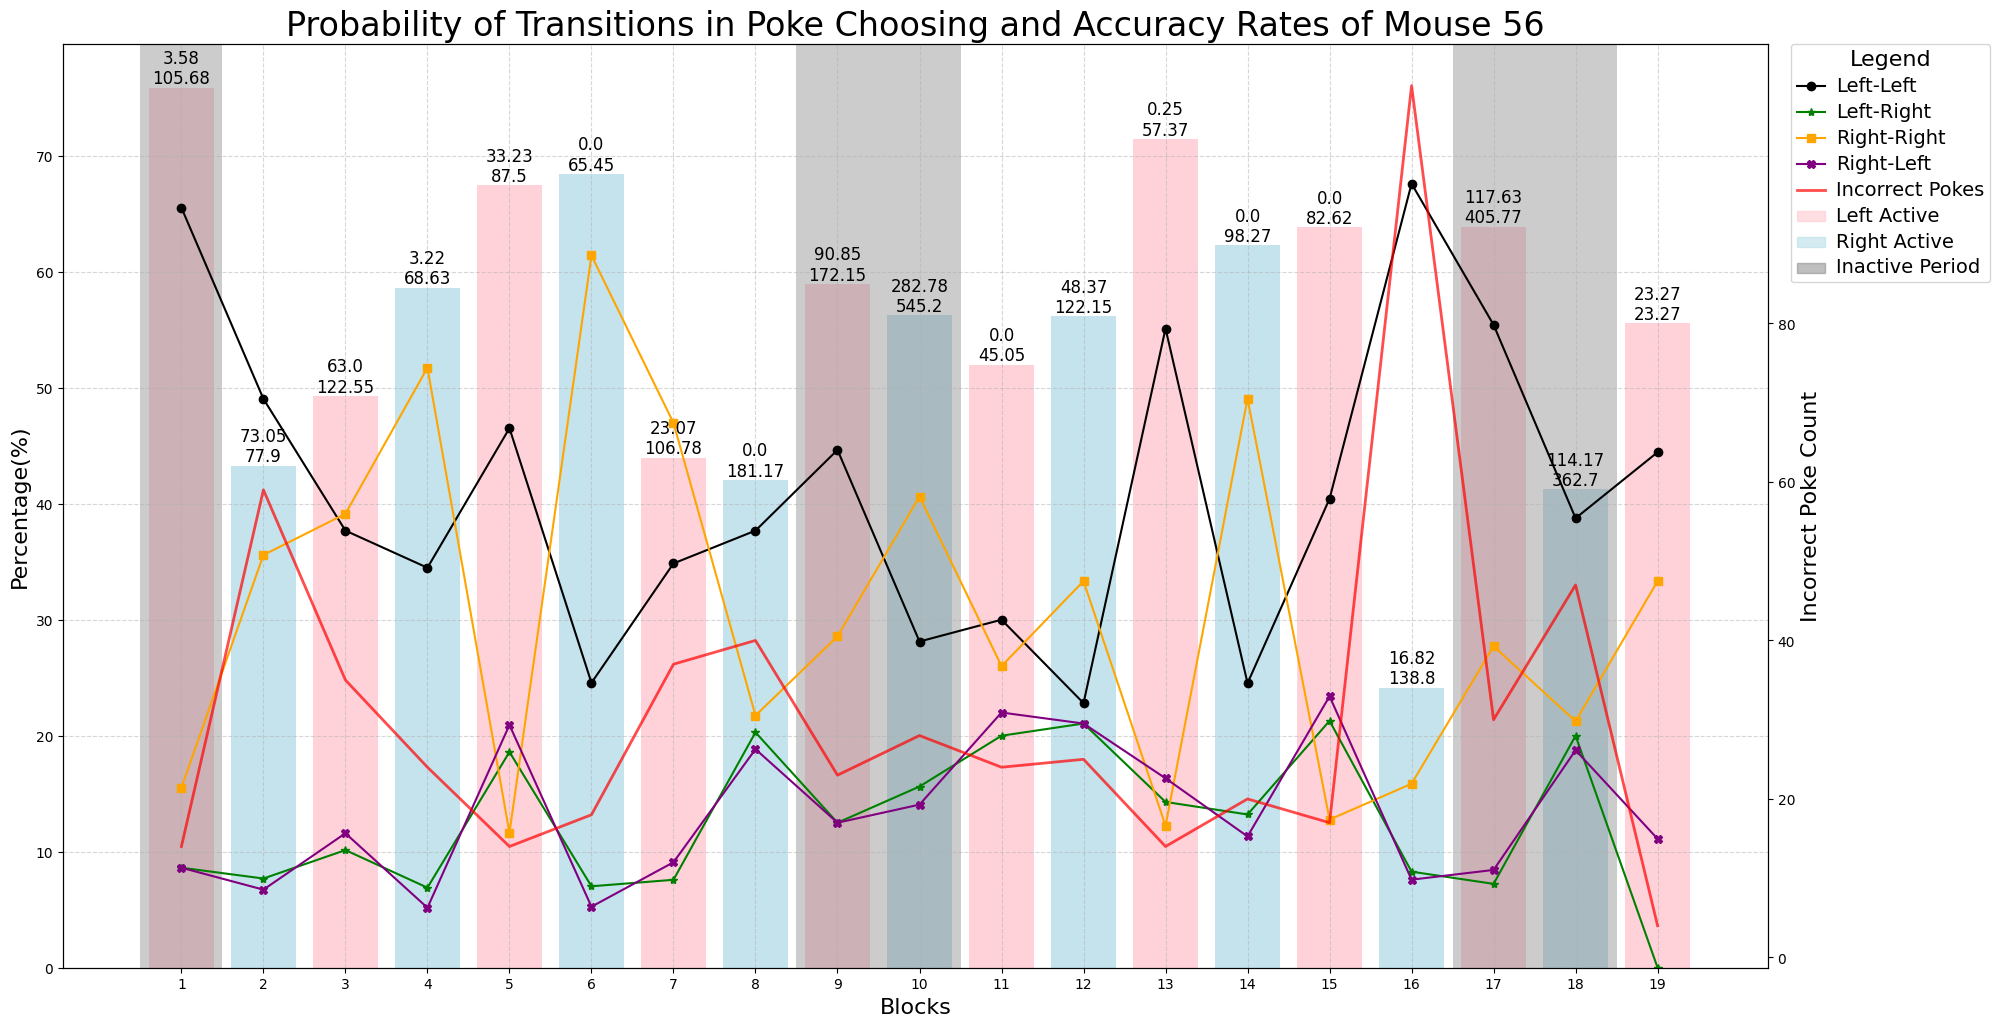

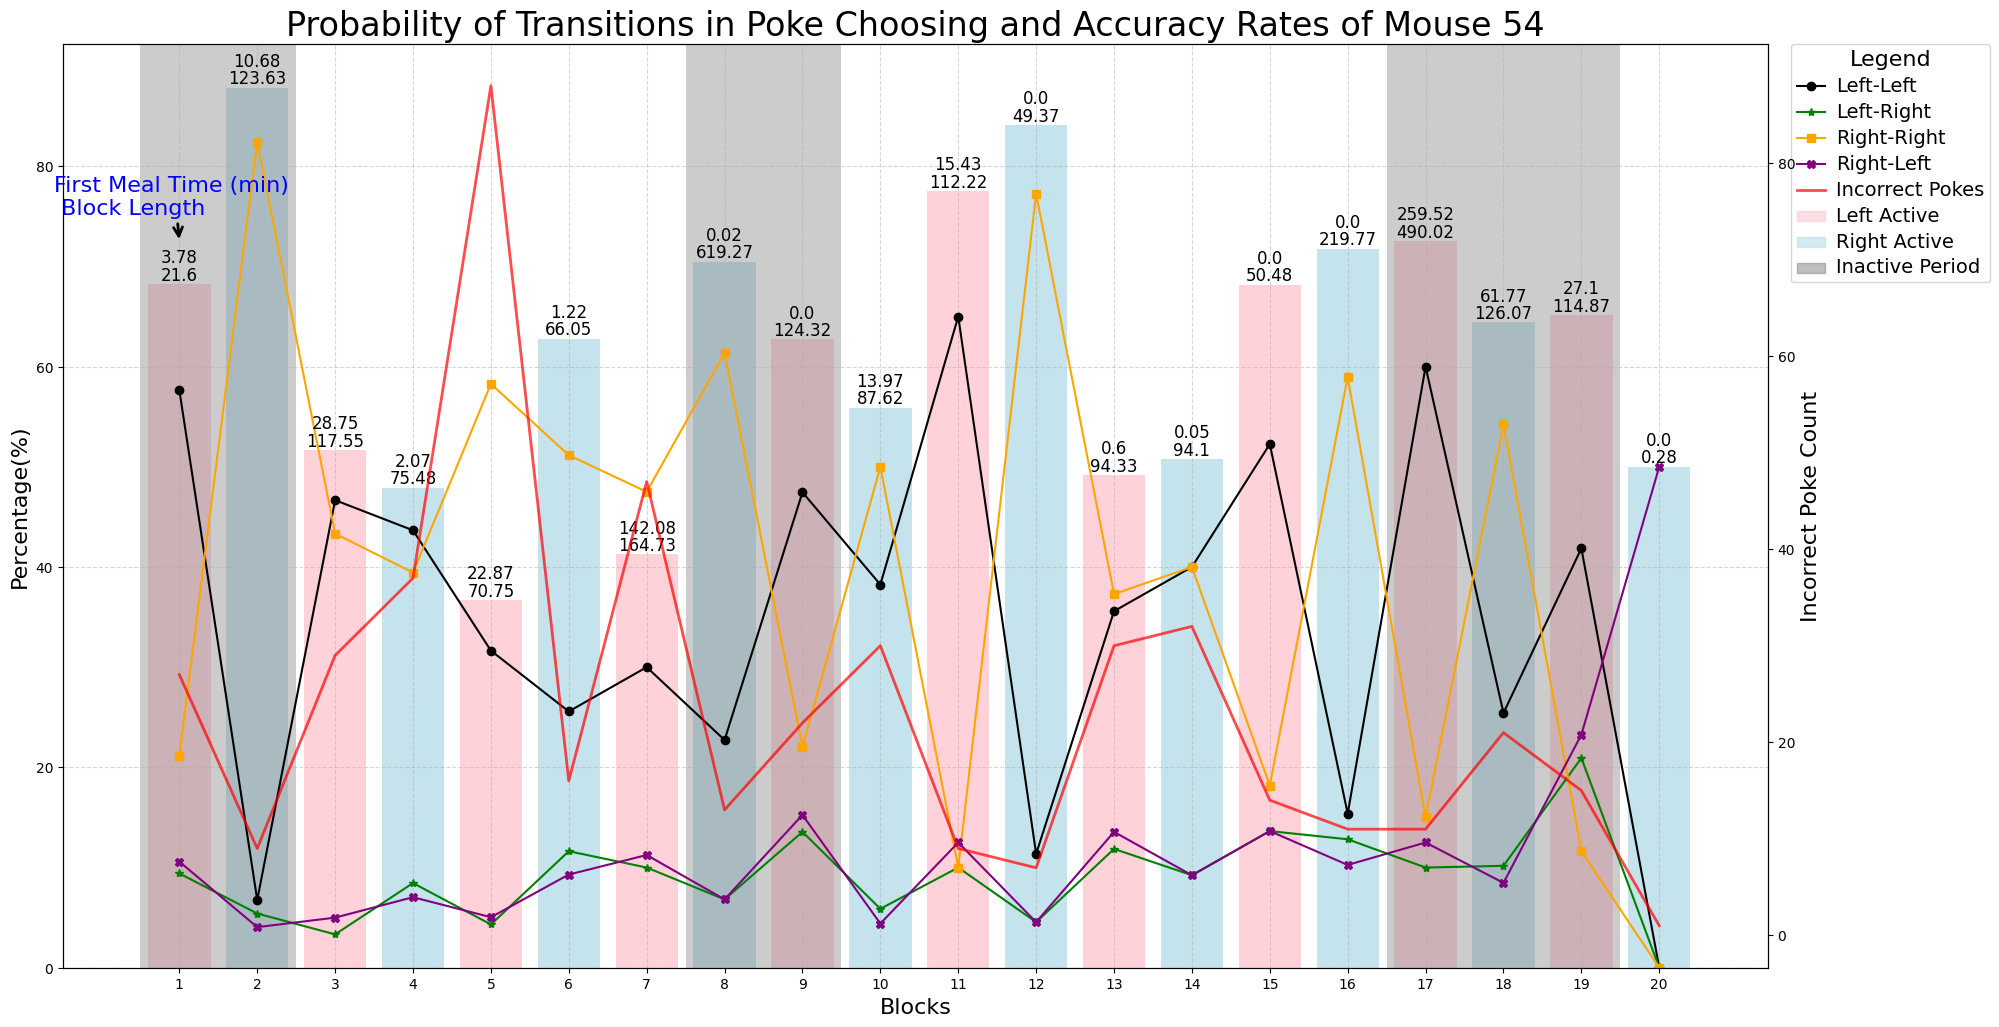

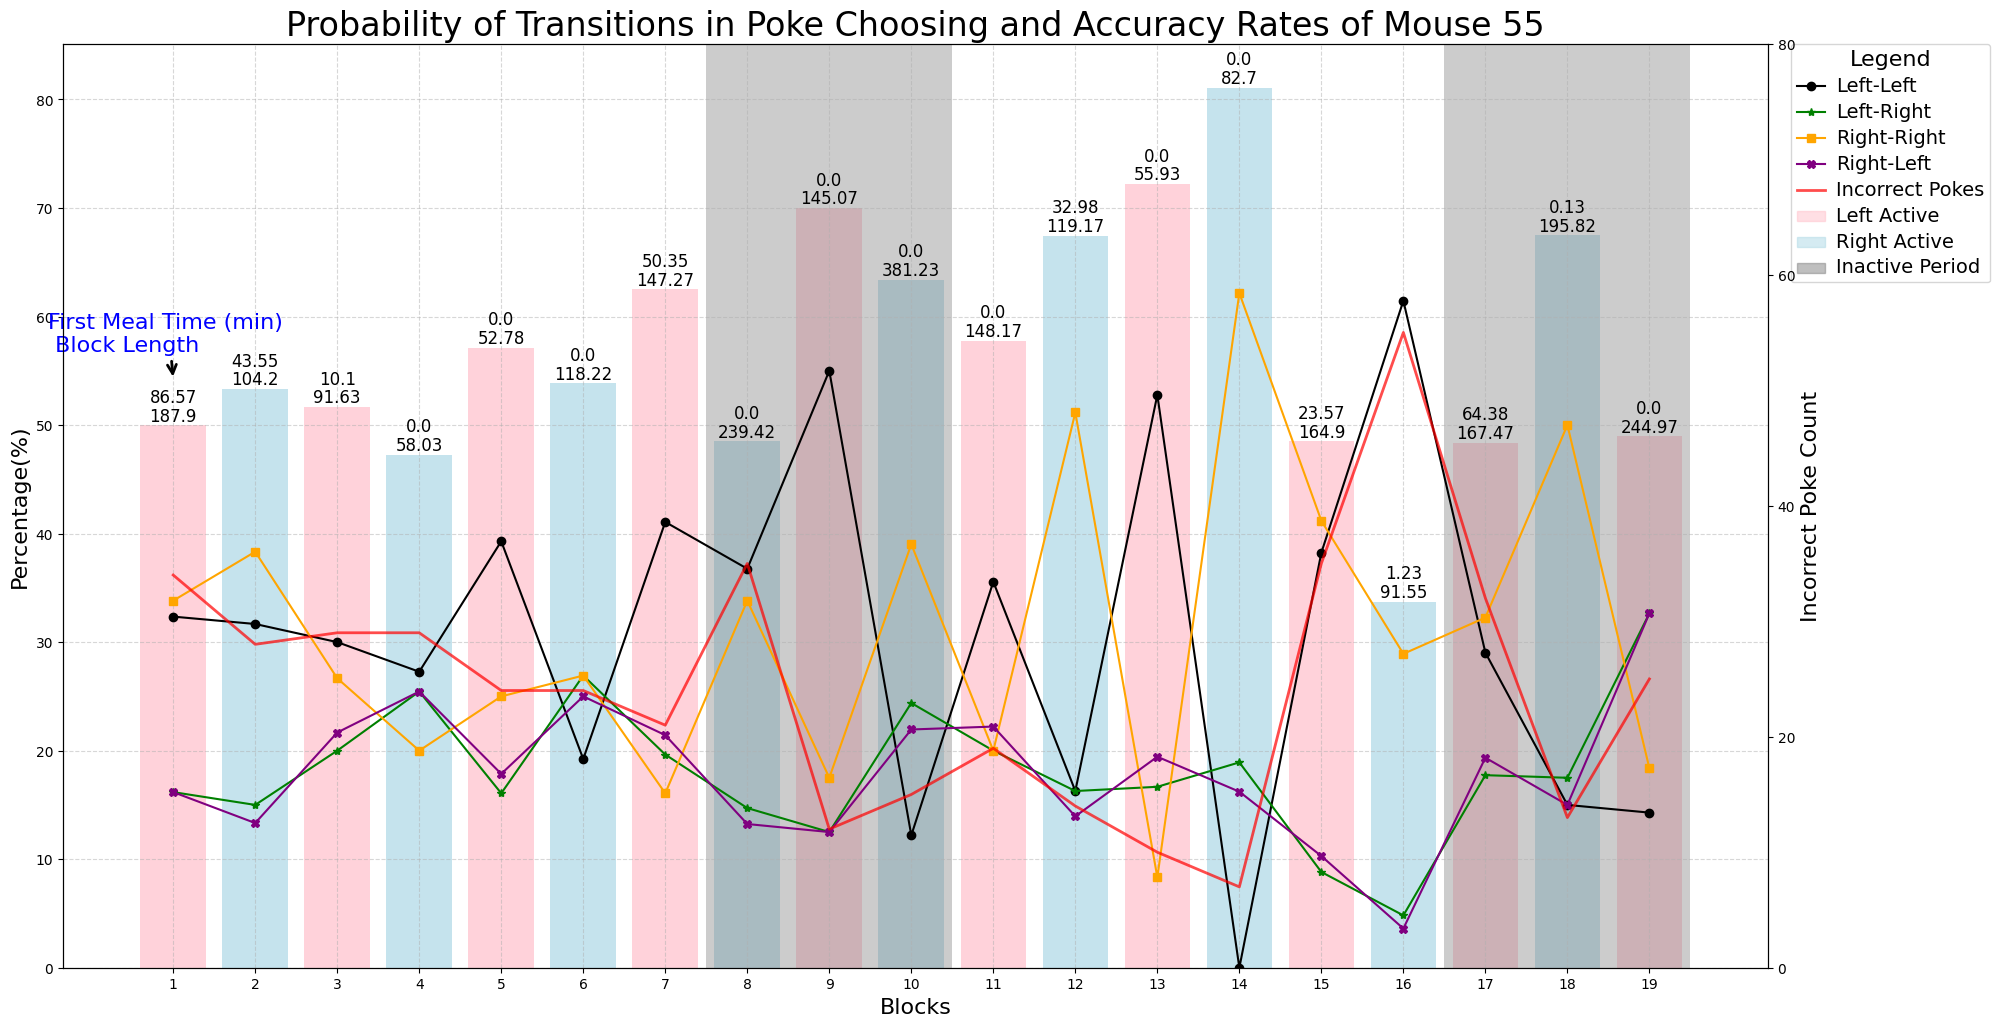

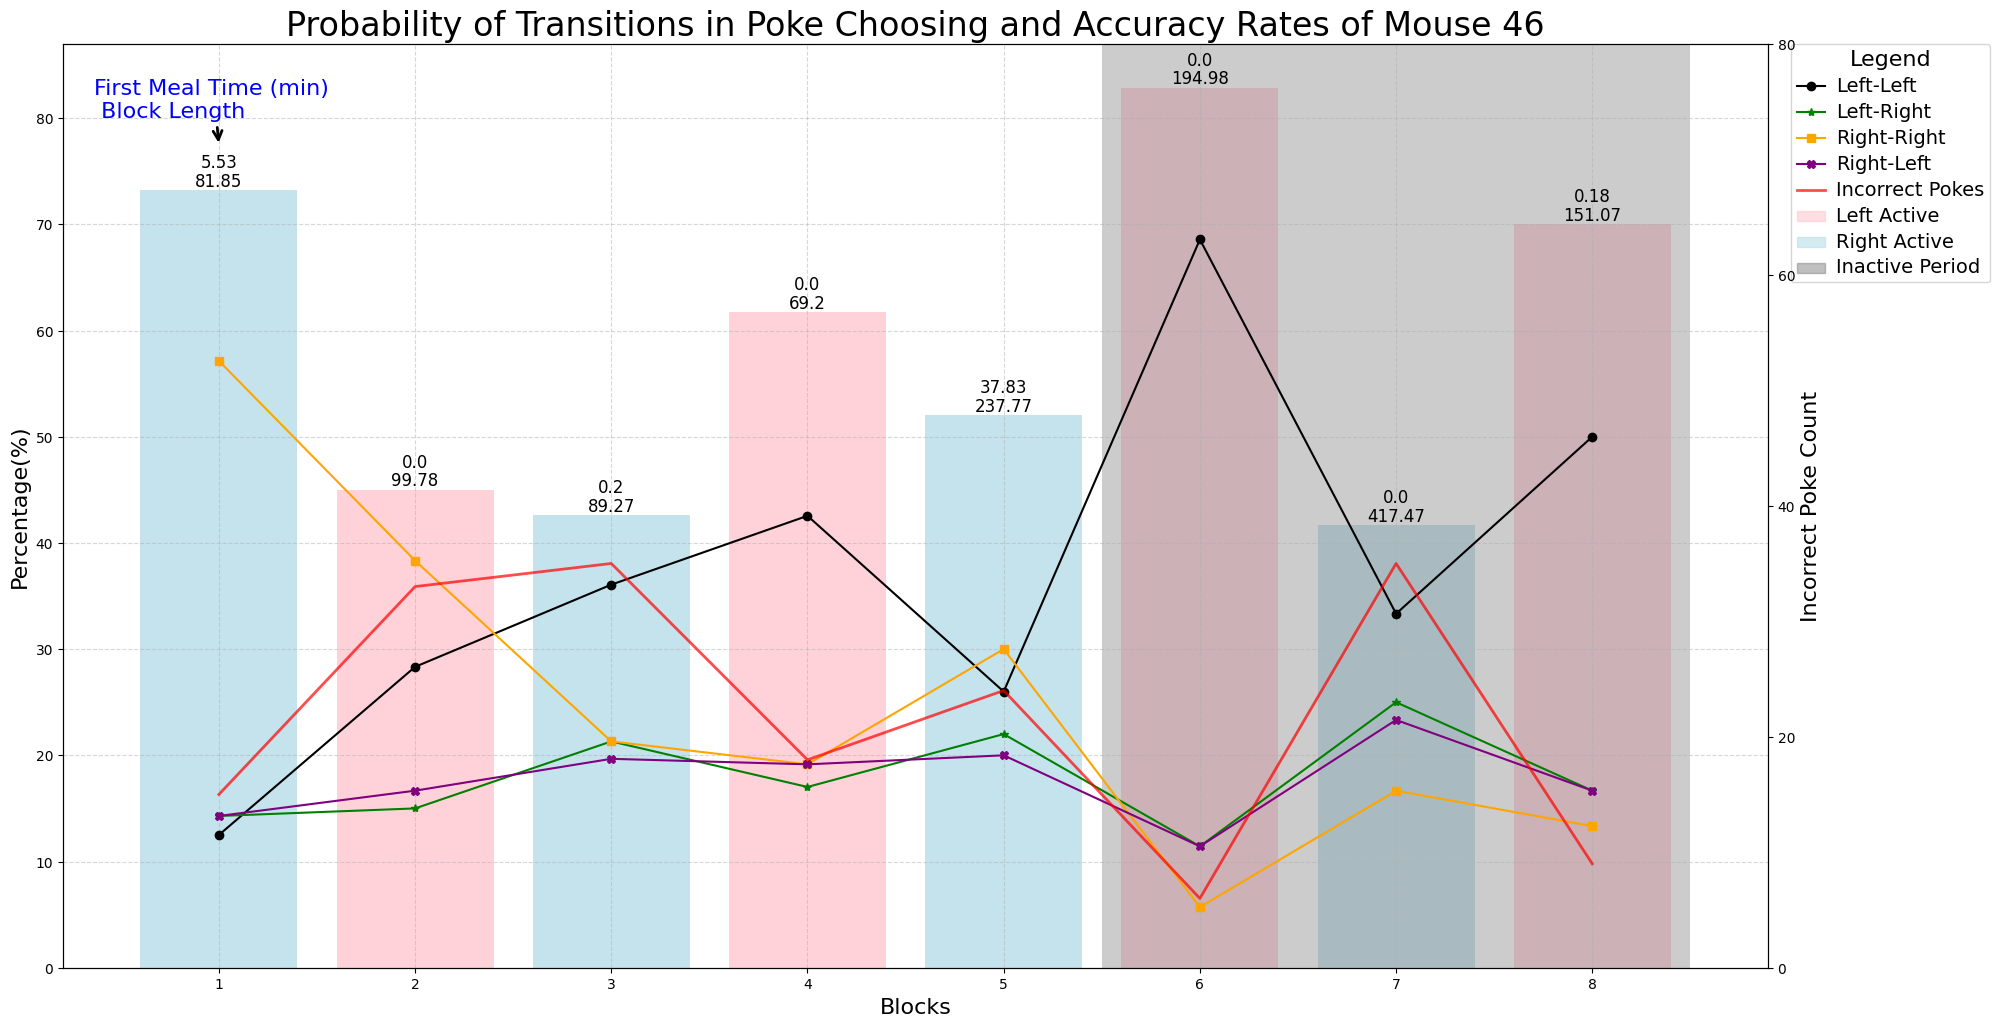

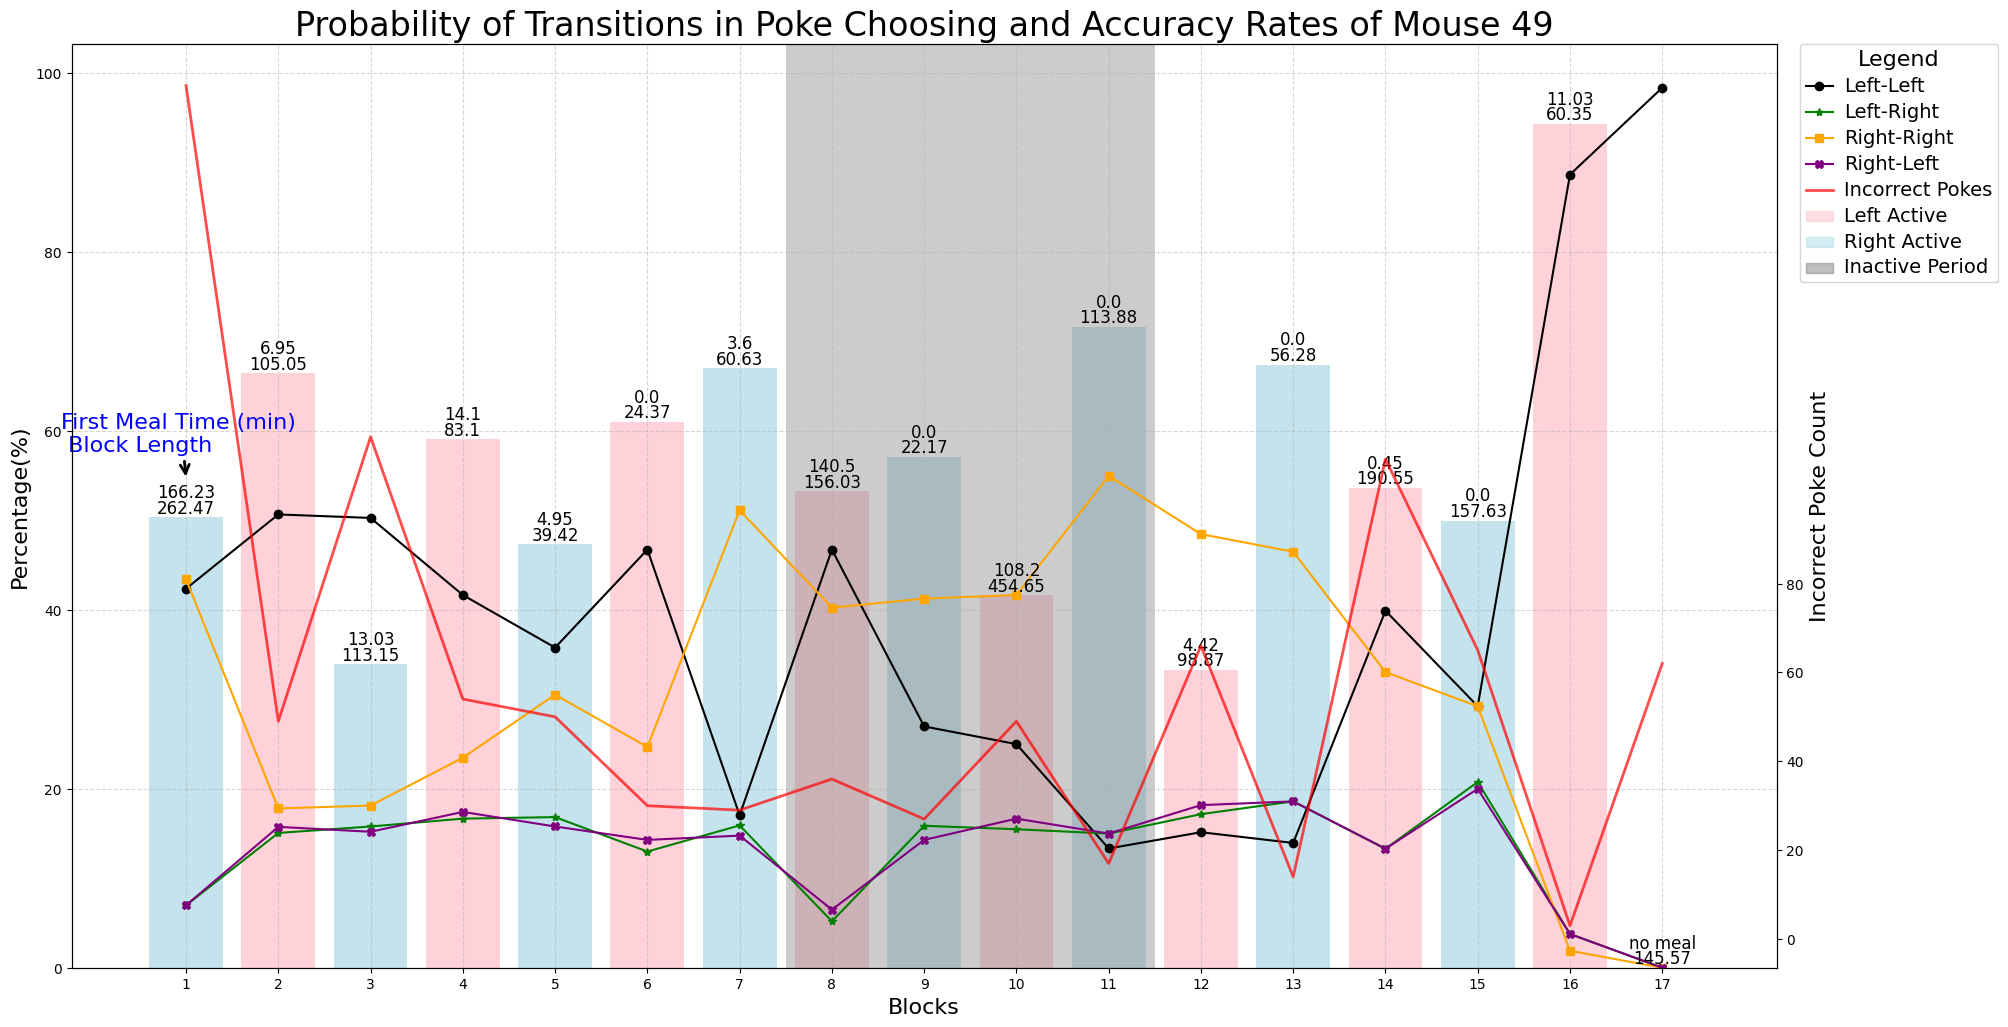

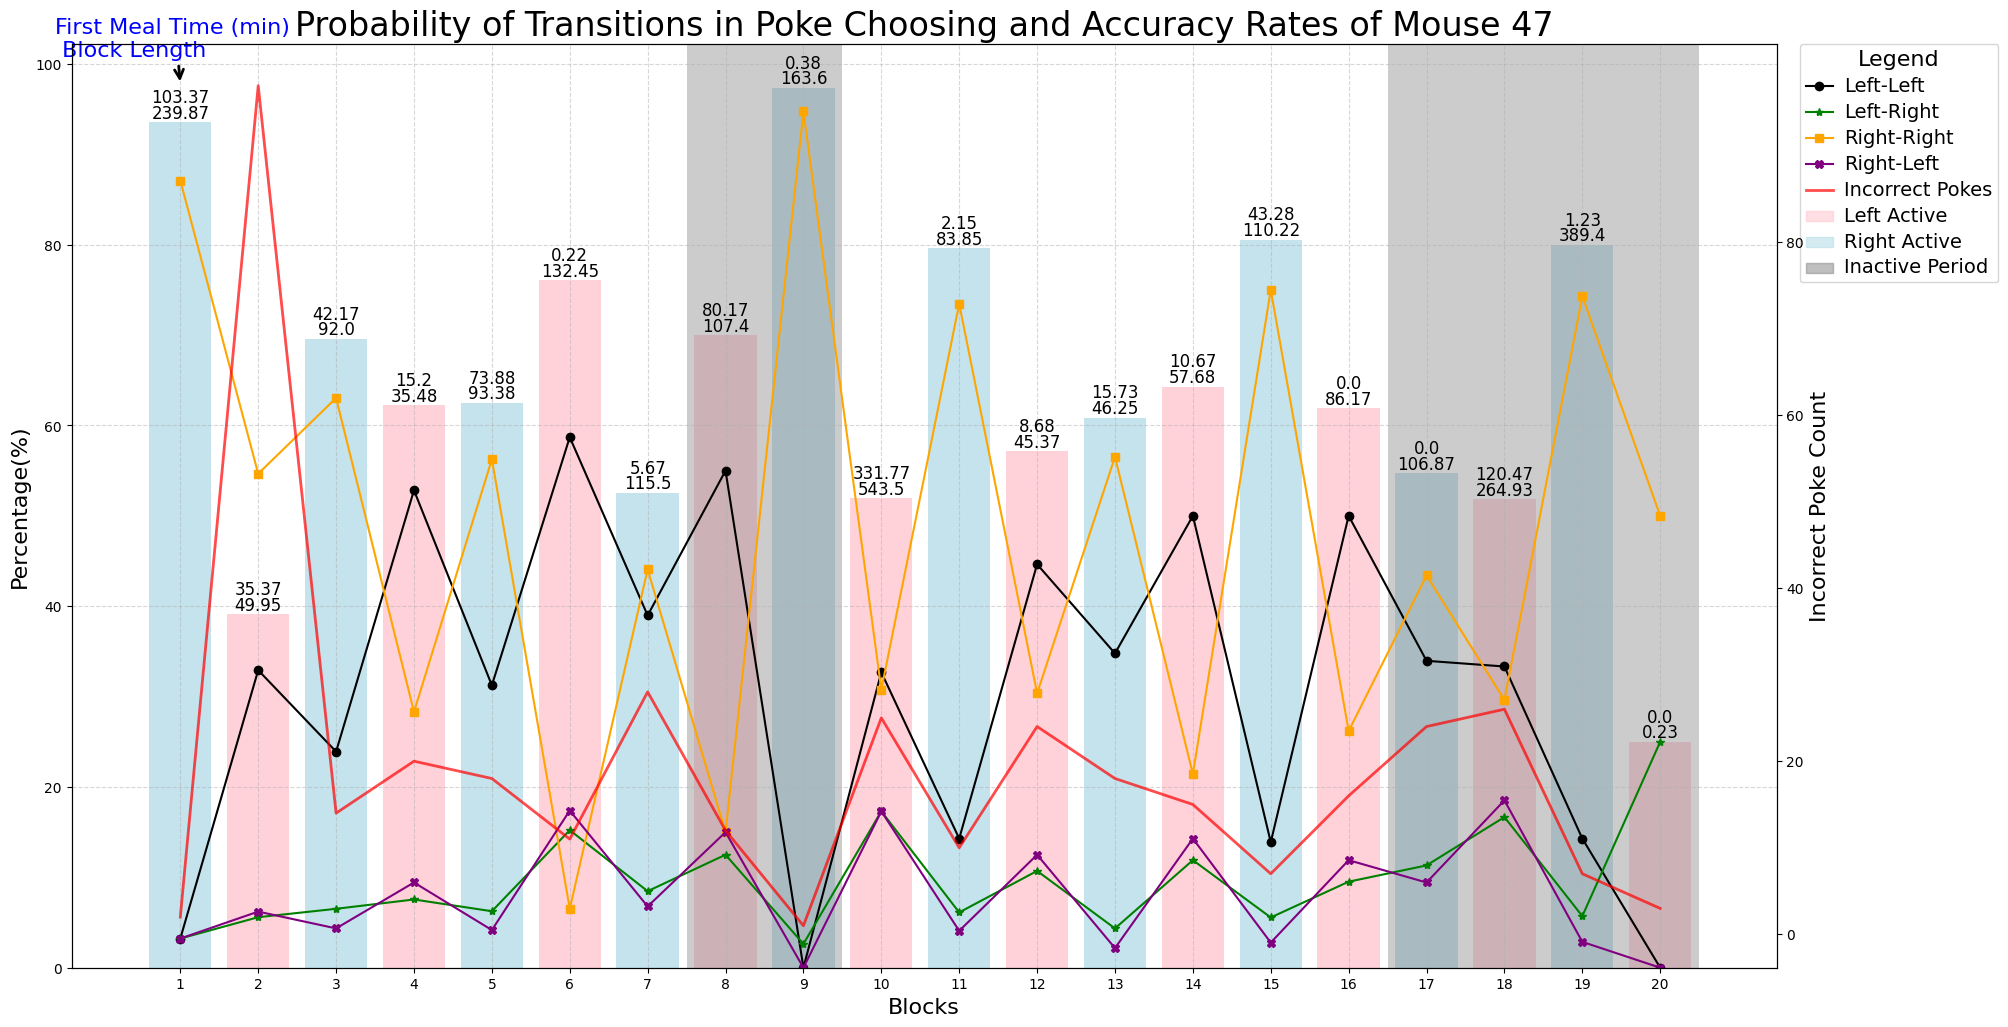

In [11]:
exp_block_fir_meal = []
exp_block_fir_meal_prop = []
for path in paths.reversal_ivsa_exp:
        data_dropped = read_csv_clean(path, remove_trivial=False, collect_time=True)
        blocks = dit.split_data_to_blocks(data_dropped)
        # meal = ml.find_meals(data, pellet_count_threshold=pellet_count_threshold, 
        #                      collect_quantile=collect_quantile, pellet_quantile=pellet_quantile)
        meal = find_meals_paper(data_dropped, time_threshold=time_threshold)
        data_stats = dit.get_transition_info(blocks, meal, reverse=True)
        
        avg_ratio, avg_time = dit.first_meal_stats(data_stats, ignore_inactive=True)
        exp_block_fir_meal.append(avg_time)
        exp_block_fir_meal_prop.append(avg_ratio)
        dit.graph_tranition_stats(data_stats, blocks, path)

Control Size: 6
PICA Size: 7
Control Average: 5.300833333333332
PICA Average: 7.137142857142856
Control Standard Deviation: 4.91695374868085
PICA Standard Deviation: 5.517277300401332


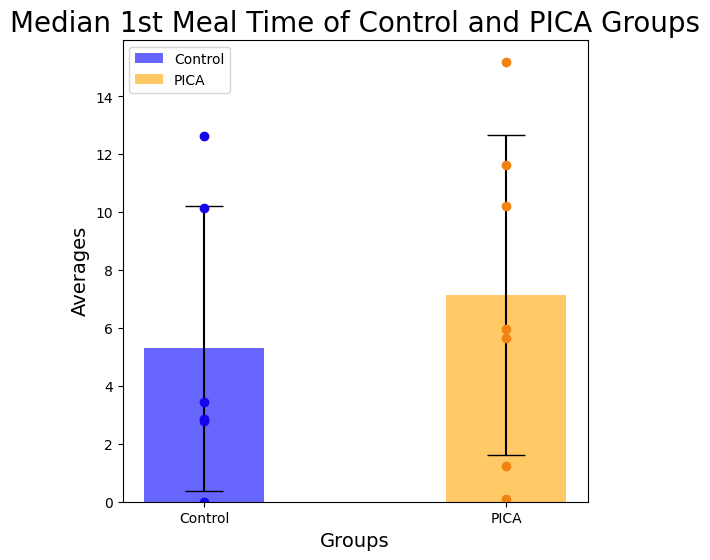

In [12]:
graph_group_stats(ctrl_block_fir_meal, exp_block_fir_meal, stats_name='Median 1st Meal Time', exp_name='PICA')

In [13]:
invs.perform_T_test(ctrl_block_fir_meal, exp_block_fir_meal, test_side='greater')

P Value is  0.2713018911015847
There is no significant difference between the two groups.


In [16]:
temp = max(exp_block_fir_meal_prop)

In [20]:
exp_block_fir_meal_prop.append(temp)

Control Size: 6
PICA Size: 7
Control Average: 0.027846872772670686
PICA Average: 0.09961511643972203
Control Standard Deviation: 0.02261921535102619
PICA Standard Deviation: 0.11245355191855338


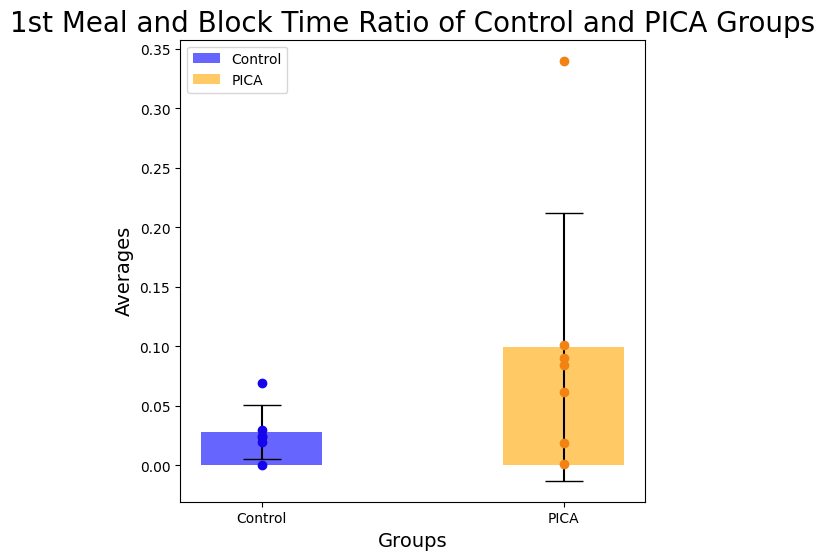

In [21]:
graph_group_stats(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, stats_name='1st Meal and Block Time Ratio', exp_name='PICA')

In [22]:
invs.perform_T_test(ctrl_block_fir_meal_prop, exp_block_fir_meal_prop, test_side='greater')

P Value is  0.07741080001265845
There is no significant difference between the two groups.
